In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit

In [2]:
# nice colours! Feel free to use them :) - Daoyuan Qian 2024
colorsBlue = ['#b3e5fc', '#0091ea']
colorsRed = ['#f18e86', '#e83b47']
colorsYellow = ['#fed9ae', '#fbad54']
colorsPurple = ['#d69bc5' ,'#a8509f']
colorsGreyOrange = ['#c3c3c3', '#f8a834']
colors = np.array([colorsBlue, colorsRed, colorsYellow, colorsPurple, colorsGreyOrange])

In [3]:
dfs = []
dfs.append(pd.read_csv('sizing_data_wSuramin.csv'))
dfs.append(pd.read_csv('sizing_data_woSuramin.csv'))

In [4]:
def sizing_fit_fn(RNA0, k, R1, R2):
    P0 = 1
    Delta = (k + RNA0 + P0) ** 2 - 4 * P0 * RNA0
    P = 0.5 * (P0 - RNA0 - k + np.sqrt(Delta))
    C = 0.5 * (P0 + RNA0 + k - np.sqrt(Delta))
    return (R1 * P + R2 * C) / (P + C)

<IPython.core.display.Javascript object>


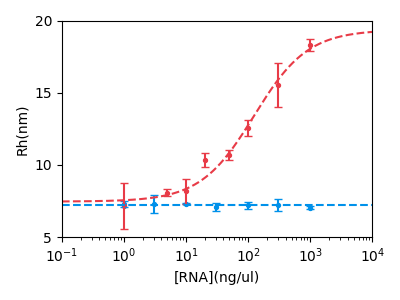

In [6]:
plt.figure(figsize = (4,3))

for i in range(2):
    plt.errorbar(dfs[i]['RNA'],
                 dfs[i]['Average'],
                 yerr = dfs[i]['Std'],
                 capsize=3,
                 c = colors[i][1],
                 ls='none')
    
    plt.scatter(dfs[i]['RNA'],
                dfs[i]['Average'],
                s = 8,
                c = colors[i][1])
    
avg0 = np.mean(dfs[0]['Average'].values)
plt.axhline(avg0, c = colors[0][1], linestyle = 'dashed')

xFit = dfs[1]['RNA'].values
yFit = dfs[1]['Average'].values
popt, pcov = curve_fit(sizing_fit_fn, xFit, yFit, p0 = (100, 7, 50))
xx = np.logspace(-1, 4, 1000)
plt.plot(xx, sizing_fit_fn(xx, *popt), c = colors[1][1], linestyle = 'dashed')

plt.yticks([5, 10, 15, 20])
plt.xscale('log')
plt.ylim(5, 20)
plt.xlim(0.1, 10000)
plt.xlabel('[RNA](ng/ul)')
plt.ylabel('Rh(nm)')
plt.tight_layout()
# plt.savefig('sizinglarge.pdf')